In [100]:
# import required libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)

In [101]:
# read from lightly preprocessed csv file

activities_with_zones = pd.read_csv('data/activities_with_zones.csv')
activities_with_zones.head()

Unnamed: 0.1  Unnamed: 0  resource_state  \
0             0           0               2   
1             1           1               2   
2             2           2               2   
3             3           3               2   
4             4           4               2   

                                athlete                         name  \
0  {'id': 3506416, 'resource_state': 1}  Feel the fatigue, need rest   
1  {'id': 3506416, 'resource_state': 1}                 Congregation   
2  {'id': 3506416, 'resource_state': 1}                 Morning Ride   
3  {'id': 3506416, 'resource_state': 1}                 Morning Ride   
4  {'id': 3506416, 'resource_state': 1}      Ahwatukee + extra miles   

   distance  moving_time  elapsed_time  total_elevation_gain  type sport_type  \
0   63539.8         8189          8382                 131.0  Ride       Ride   
1   65466.1         8033          9545                 276.0  Ride       Ride   
2   24439.8         4925          4972                  58.0  Ride       Ride   
3    8939.8         1432          1628                   6.0  Ride       Ride   
4  104175.0        13563         15833                 331.0  Ride       Ride   

   workout_type           id            start_date      start_date_local  \
0          10.0  10057164887  2023-10-17T17:00:06Z  2023-10-17T10:00:06Z   
1          10.0  10044558487  2023-10-15T13:22:30Z  2023-10-15T06:22:30Z   
2           NaN  10038133180  2023-10-14T15:00:20Z  2023-10-14T08:00:20Z   
3           NaN  10038132445  2023-10-14T14:31:51Z  2023-10-14T07:31:51Z   
4          10.0  10032329923  2023-10-13T13:24:08Z  2023-10-13T06:24:08Z   

                      timezone  utc_offset location_city location_state  \
0  (GMT-07:00) America/Phoenix    -25200.0           NaN            NaN   
1  (GMT-07:00) America/Phoenix    -25200.0           NaN            NaN   
2  (GMT-07:00) America/Phoenix    -25200.0           NaN            NaN   
3  (GMT-07:00) America/Phoenix    -25200.0           NaN            NaN   
4  (GMT-07:00) America/Phoenix    -25200.0           NaN            NaN   

  location_country  achievement_count  kudos_count  comment_count  \
0    United States                 10           17              0   
1    United States                 19           46              0   
2    United States                  0           18              0   
3    United States                  0           14              0   
4    United States                 48           32              0   

   athlete_count  photo_count  \
0              1            0   
1             31            0   
2              1            0   
3              1            0   
4              1            0   

                                                 map  trainer  commute  \
0  {'id': 'a10057164887', 'summary_polyline': 'qe...    False    False   
1  {'id': 'a10044558487', 'summary_polyline': 'eg...    False    False   
2  {'id': 'a10038133180', 'summary_polyline': 'co...    False    False   
3  {'id': 'a10038132445', 'summary_polyline': 'af...    False    False   
4  {'id': 'a10032329923', 'summary_polyline': 'of...    False    False   

   manual  private visibility  flagged    gear_id  \
0   False    False   everyone    False  b12532853   
1   False    False   everyone    False  b12532853   
2   False    False   everyone    False  b12532853   
3   False    False   everyone    False  b12532853   
4   False    False   everyone    False  b12532853   

                                start_latlng  \
0  [33.419589484110475, -111.92323436960578]   
1   [33.41984865255654, -111.92403031513095]   
2   [33.42600733973086, -111.99600865133107]   
3  [33.419796684756875, -111.92354500293732]   
4  [33.419574815779924, -111.92323244176805]   

                                 end_latlng  average_speed  max_speed  \
0  [33.41942980885506, -111.92315675318241]          7.759     13.210   
1  [33.41946383938193, -111.92317427136004]          8.150     16.662   
2  [33

In [102]:
# reduce features

reduced_columns = ['distance', 'moving_time', 'total_elevation_gain', 'sport_type', 'start_date_local', 'average_speed', 'average_temp', 'average_watts', 'kilojoules', 'average_heartrate', 'suffer_score']
reduced_data = activities_with_zones[reduced_columns]
reduced_data.head()

distance  moving_time  total_elevation_gain sport_type  \
0   63539.8         8189                 131.0       Ride   
1   65466.1         8033                 276.0       Ride   
2   24439.8         4925                  58.0       Ride   
3    8939.8         1432                   6.0       Ride   
4  104175.0        13563                 331.0       Ride   

       start_date_local  average_speed  average_temp  average_watts  \
0  2023-10-17T10:00:06Z          7.759          32.0          155.9   
1  2023-10-15T06:22:30Z          8.150          17.0          149.1   
2  2023-10-14T08:00:20Z          4.962          21.0           73.6   
3  2023-10-14T07:31:51Z          6.243          17.0           75.0   
4  2023-10-13T06:24:08Z          7.681          20.0          148.8   

   kilojoules  average_heartrate  suffer_score  
0      1276.9              152.1         176.0  
1      1197.3              144.8         117.0  
2       362.5              128.2          28.0  
3       107.4              112.2           4.0  
4      2018.6              135.2         108.0

In [103]:
reduced_data.describe()

distance   moving_time  total_elevation_gain  average_speed  \
count    1601.000000   1601.000000           1601.000000    1601.000000   
mean    33480.830668   5097.313554            310.521674       6.204655   
std     29839.536824   4118.879778            475.899087       2.205383   
min         0.000000     89.000000              0.000000       0.000000   
25%      8715.500000   2123.000000              0.000000       5.397000   
50%     25808.100000   3904.000000            132.000000       6.396000   
75%     49850.300000   7302.000000            441.400000       7.660000   
max    162929.000000  51131.000000           4011.100000      12.414000   

       average_temp  average_watts   kilojoules  average_heartrate  \
count    829.000000    1387.000000  1387.000000         916.000000   
mean      21.371532     135.349603   780.751622         137.433624   
std        5.603610      44.241447   679.579651          19.376394   
min        7.000000       0.400000     0.200000          44.700000   
25%       18.000000     103.500000   281.600000         125.175000   
50%       22.000000     135.100000   613.300000         140.400000   
75%       25.000000     164.750000  1146.300000         150.125000   
max       40.000000     379.400000  3862.500000         186.700000   

       suffer_score  
count    919.000000  
mean      65.414581  
std       61.841397  
min        0.000000  
25%       15.000000  
50%       54.000000  
75%       93.000000  
max      401.000000

In [104]:
# fill NaN values with mean

reduced_cleaned = reduced_data.copy()
reduced_cleaned['average_temp'] = reduced_data['average_temp'].fillna(reduced_data['average_temp'].mean())
reduced_cleaned['average_watts'] = reduced_data['average_watts'].fillna(reduced_data['average_watts'].mean())
reduced_cleaned['kilojoules'] = reduced_data['kilojoules'].fillna(reduced_data['kilojoules'].mean())
reduced_cleaned['average_heartrate'] = reduced_data['average_heartrate'].fillna(reduced_data['average_heartrate'].mean())
reduced_cleaned['suffer_score'] = reduced_data['suffer_score'].fillna(reduced_data['suffer_score'].mean())
reduced_cleaned.describe(include='all')

distance   moving_time  total_elevation_gain sport_type  \
count     1601.000000   1601.000000           1601.000000       1601   
unique            NaN           NaN                   NaN          9   
top               NaN           NaN                   NaN       Ride   
freq              NaN           NaN                   NaN       1437   
mean     33480.830668   5097.313554            310.521674        NaN   
std      29839.536824   4118.879778            475.899087        NaN   
min          0.000000     89.000000              0.000000        NaN   
25%       8715.500000   2123.000000              0.000000        NaN   
50%      25808.100000   3904.000000            132.000000        NaN   
75%      49850.300000   7302.000000            441.400000        NaN   
max     162929.000000  51131.000000           4011.100000        NaN   

            start_date_local  average_speed  average_temp  average_watts  \
count                   1601    1601.000000   1601.000000    1601.000000   
unique                  1601            NaN           NaN            NaN   
top     2023-10-17T10:00:06Z            NaN           NaN            NaN   
freq                       1            NaN           NaN            NaN   
mean                     NaN       6.204655     21.371532     135.349603   
std                      NaN       2.205383      4.031095      41.176644   
min                      NaN       0.000000      7.000000       0.400000   
25%                      NaN       5.397000     21.000000     109.800000   
50%                      NaN       6.396000     21.371532     135.349603   
75%                      NaN       7.660000     22.000000     161.000000   
max                      NaN      12.414000     40.000000     379.400000   

         kilojoules  average_heartrate  suffer_score  
count   1601.000000        1601.000000   1601.000000  
unique          NaN                NaN           NaN  
top             NaN                NaN           NaN  
freq            NaN                NaN           NaN  
mean     780.751622         137.433624     65.414581  
std      632.502126          14.652898     46.842562  
min        0.200000          44.700000      0.000000  
25%      316.100000         137.433624     42.000000  
50%      742.500000         137.433624     65.414581  
75%     1039.100000         143.100000     65.414581  
max     3862.500000         186.700000    401.000000

In [105]:
reduced_cleaned['sport_type'].unique()

array(['Ride', 'WeightTraining', 'Walk', 'Velomobile', 'Workout', 'Run',
       'Rowing', 'VirtualRide', 'Hike'], dtype=object)

In [106]:
len(reduced_cleaned[reduced_cleaned['sport_type'] == 'Ride'])

1437

In [107]:
# focus only on rides

only_rides = reduced_cleaned[reduced_cleaned['sport_type'] == 'Ride'].drop('sport_type', axis=1)
only_rides.describe(include='all')

distance   moving_time  total_elevation_gain  \
count     1437.000000   1437.000000           1437.000000   
unique            NaN           NaN                   NaN   
top               NaN           NaN                   NaN   
freq              NaN           NaN                   NaN   
mean     36855.183507   5314.964509            340.208768   
std      29625.520829   4229.274455            492.228618   
min          0.000000     89.000000              0.000000   
25%      15620.600000   2401.000000              2.300000   
50%      29145.700000   4147.000000            168.000000   
75%      53448.800000   7591.000000            505.500000   
max     162929.000000  51131.000000           4011.100000   

            start_date_local  average_speed  average_temp  average_watts  \
count                   1437    1437.000000   1437.000000    1437.000000   
unique                  1437            NaN           NaN            NaN   
top     2023-10-17T10:00:06Z            NaN           NaN            NaN   
freq                       1            NaN           NaN            NaN   
mean                     NaN       6.705686     21.410923     135.253080   
std                      NaN       1.580557      4.179976      43.118257   
min                      NaN       0.000000      7.000000       0.400000   
25%                      NaN       5.697000     21.000000     106.000000   
50%                      NaN       6.586000     21.371532     135.349603   
75%                      NaN       7.777000     22.000000     163.900000   
max                      NaN      12.414000     40.000000     379.400000   

         kilojoules  average_heartrate  suffer_score  
count   1437.000000        1437.000000   1437.000000  
unique          NaN                NaN           NaN  
top             NaN                NaN           NaN  
freq            NaN                NaN           NaN  
mean     785.032151         137.925716     67.528007  
std      665.636146          13.107630     47.298183  
min        0.200000          44.700000      0.000000  
25%      300.500000         137.433624     51.000000  
50%      649.000000         137.433624     65.414581  
75%     1125.500000         142.900000     67.000000  
max     3862.500000         186.700000    401.000000

In [108]:
# convert time to timestamp, required for later standardization

only_rides_cleaned = only_rides.copy().drop('start_date_local', axis=1)
only_rides_cleaned['timestamp'] = pd.to_datetime(only_rides['start_date_local'])
only_rides_cleaned['timestamp'] = only_rides_cleaned['timestamp'].apply(lambda x : x.timestamp())
only_rides_cleaned.describe(include='all')

distance   moving_time  total_elevation_gain  average_speed  \
count    1437.000000   1437.000000           1437.000000    1437.000000   
mean    36855.183507   5314.964509            340.208768       6.705686   
std     29625.520829   4229.274455            492.228618       1.580557   
min         0.000000     89.000000              0.000000       0.000000   
25%     15620.600000   2401.000000              2.300000       5.697000   
50%     29145.700000   4147.000000            168.000000       6.586000   
75%     53448.800000   7591.000000            505.500000       7.777000   
max    162929.000000  51131.000000           4011.100000      12.414000   

       average_temp  average_watts   kilojoules  average_heartrate  \
count   1437.000000    1437.000000  1437.000000        1437.000000   
mean      21.410923     135.253080   785.032151         137.925716   
std        4.179976      43.118257   665.636146          13.107630   
min        7.000000       0.400000     0.200000          44.700000   
25%       21.000000     106.000000   300.500000         137.433624   
50%       21.371532     135.349603   649.000000         137.433624   
75%       22.000000     163.900000  1125.500000         142.900000   
max       40.000000     379.400000  3862.500000         186.700000   

       suffer_score     timestamp  
count   1437.000000  1.437000e+03  
mean      67.528007  1.524221e+09  
std       47.298183  9.596791e+07  
min        0.000000  1.387347e+09  
25%       51.000000  1.443679e+09  
50%       65.414581  1.505458e+09  
75%       67.000000  1.598515e+09  
max      401.000000  1.697537e+09

In [109]:
# generate correlation matrix

corr_matrix = only_rides_cleaned.corr()
corr_matrix

distance  moving_time  total_elevation_gain  \
distance              1.000000     0.908011              0.678688   
moving_time           0.908011     1.000000              0.746905   
total_elevation_gain  0.678688     0.746905              1.000000   
average_speed         0.436633     0.181833              0.021674   
average_temp         -0.062032    -0.050948             -0.165189   
average_watts         0.432991     0.325834              0.301854   
kilojoules            0.938799     0.905895              0.807912   
average_heartrate     0.260322     0.142749              0.072221   
suffer_score          0.584655     0.467541              0.266927   
timestamp            -0.280215    -0.302402             -0.373291   

                      average_speed  average_temp  average_watts  kilojoules  \
distance                   0.436633     -0.062032       0.432991    0.938799   
moving_time                0.181833     -0.050948       0.325834    0.905895   
total_elevation_gain       0.021674     -0.165189       0.301854    0.807912   
average_speed              1.000000     -0.028112       0.613495    0.317688   
average_temp              -0.028112      1.000000       0.051882   -0.026753   
average_watts              0.613495      0.051882       1.000000    0.517396   
kilojoules                 0.317688     -0.026753       0.517396    1.000000   
average_heartrate          0.522900      0.035603       0.626947    0.256095   
suffer_score               0.464359     -0.053888       0.474231    0.514532   
timestamp                 -0.092701      0.163206      -0.335945   -0.325646   

                      average_heartrate  suffer_score  timestamp  
distance                       0.260322      0.584655  -0.280215  
moving_time                    0.142749      0.467541  -0.302402  
total_elevation_gain           0.072221      0.266927  -0.373291  
average_speed                  0.522900      0.464359  -0.092701  
average_temp                   0.035603     -0.053888   0.163206  
average_watts                  0.626947      0.474231  -0.335945  
kilojoules                     0.256095      0.514532  -0.325646  
average_heartrate              1.000000      0.622508  -0.174003  
suffer_score                   0.622508      1.000000  -0.090522  
timestamp                     -0.174003     -0.090522   1.000000

<Axes: >

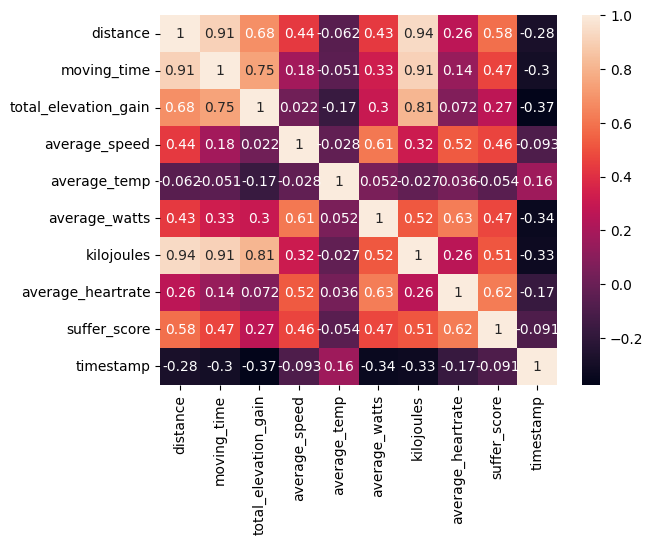

In [110]:
# visualize correlation matrix

sns.heatmap(corr_matrix, annot=True)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

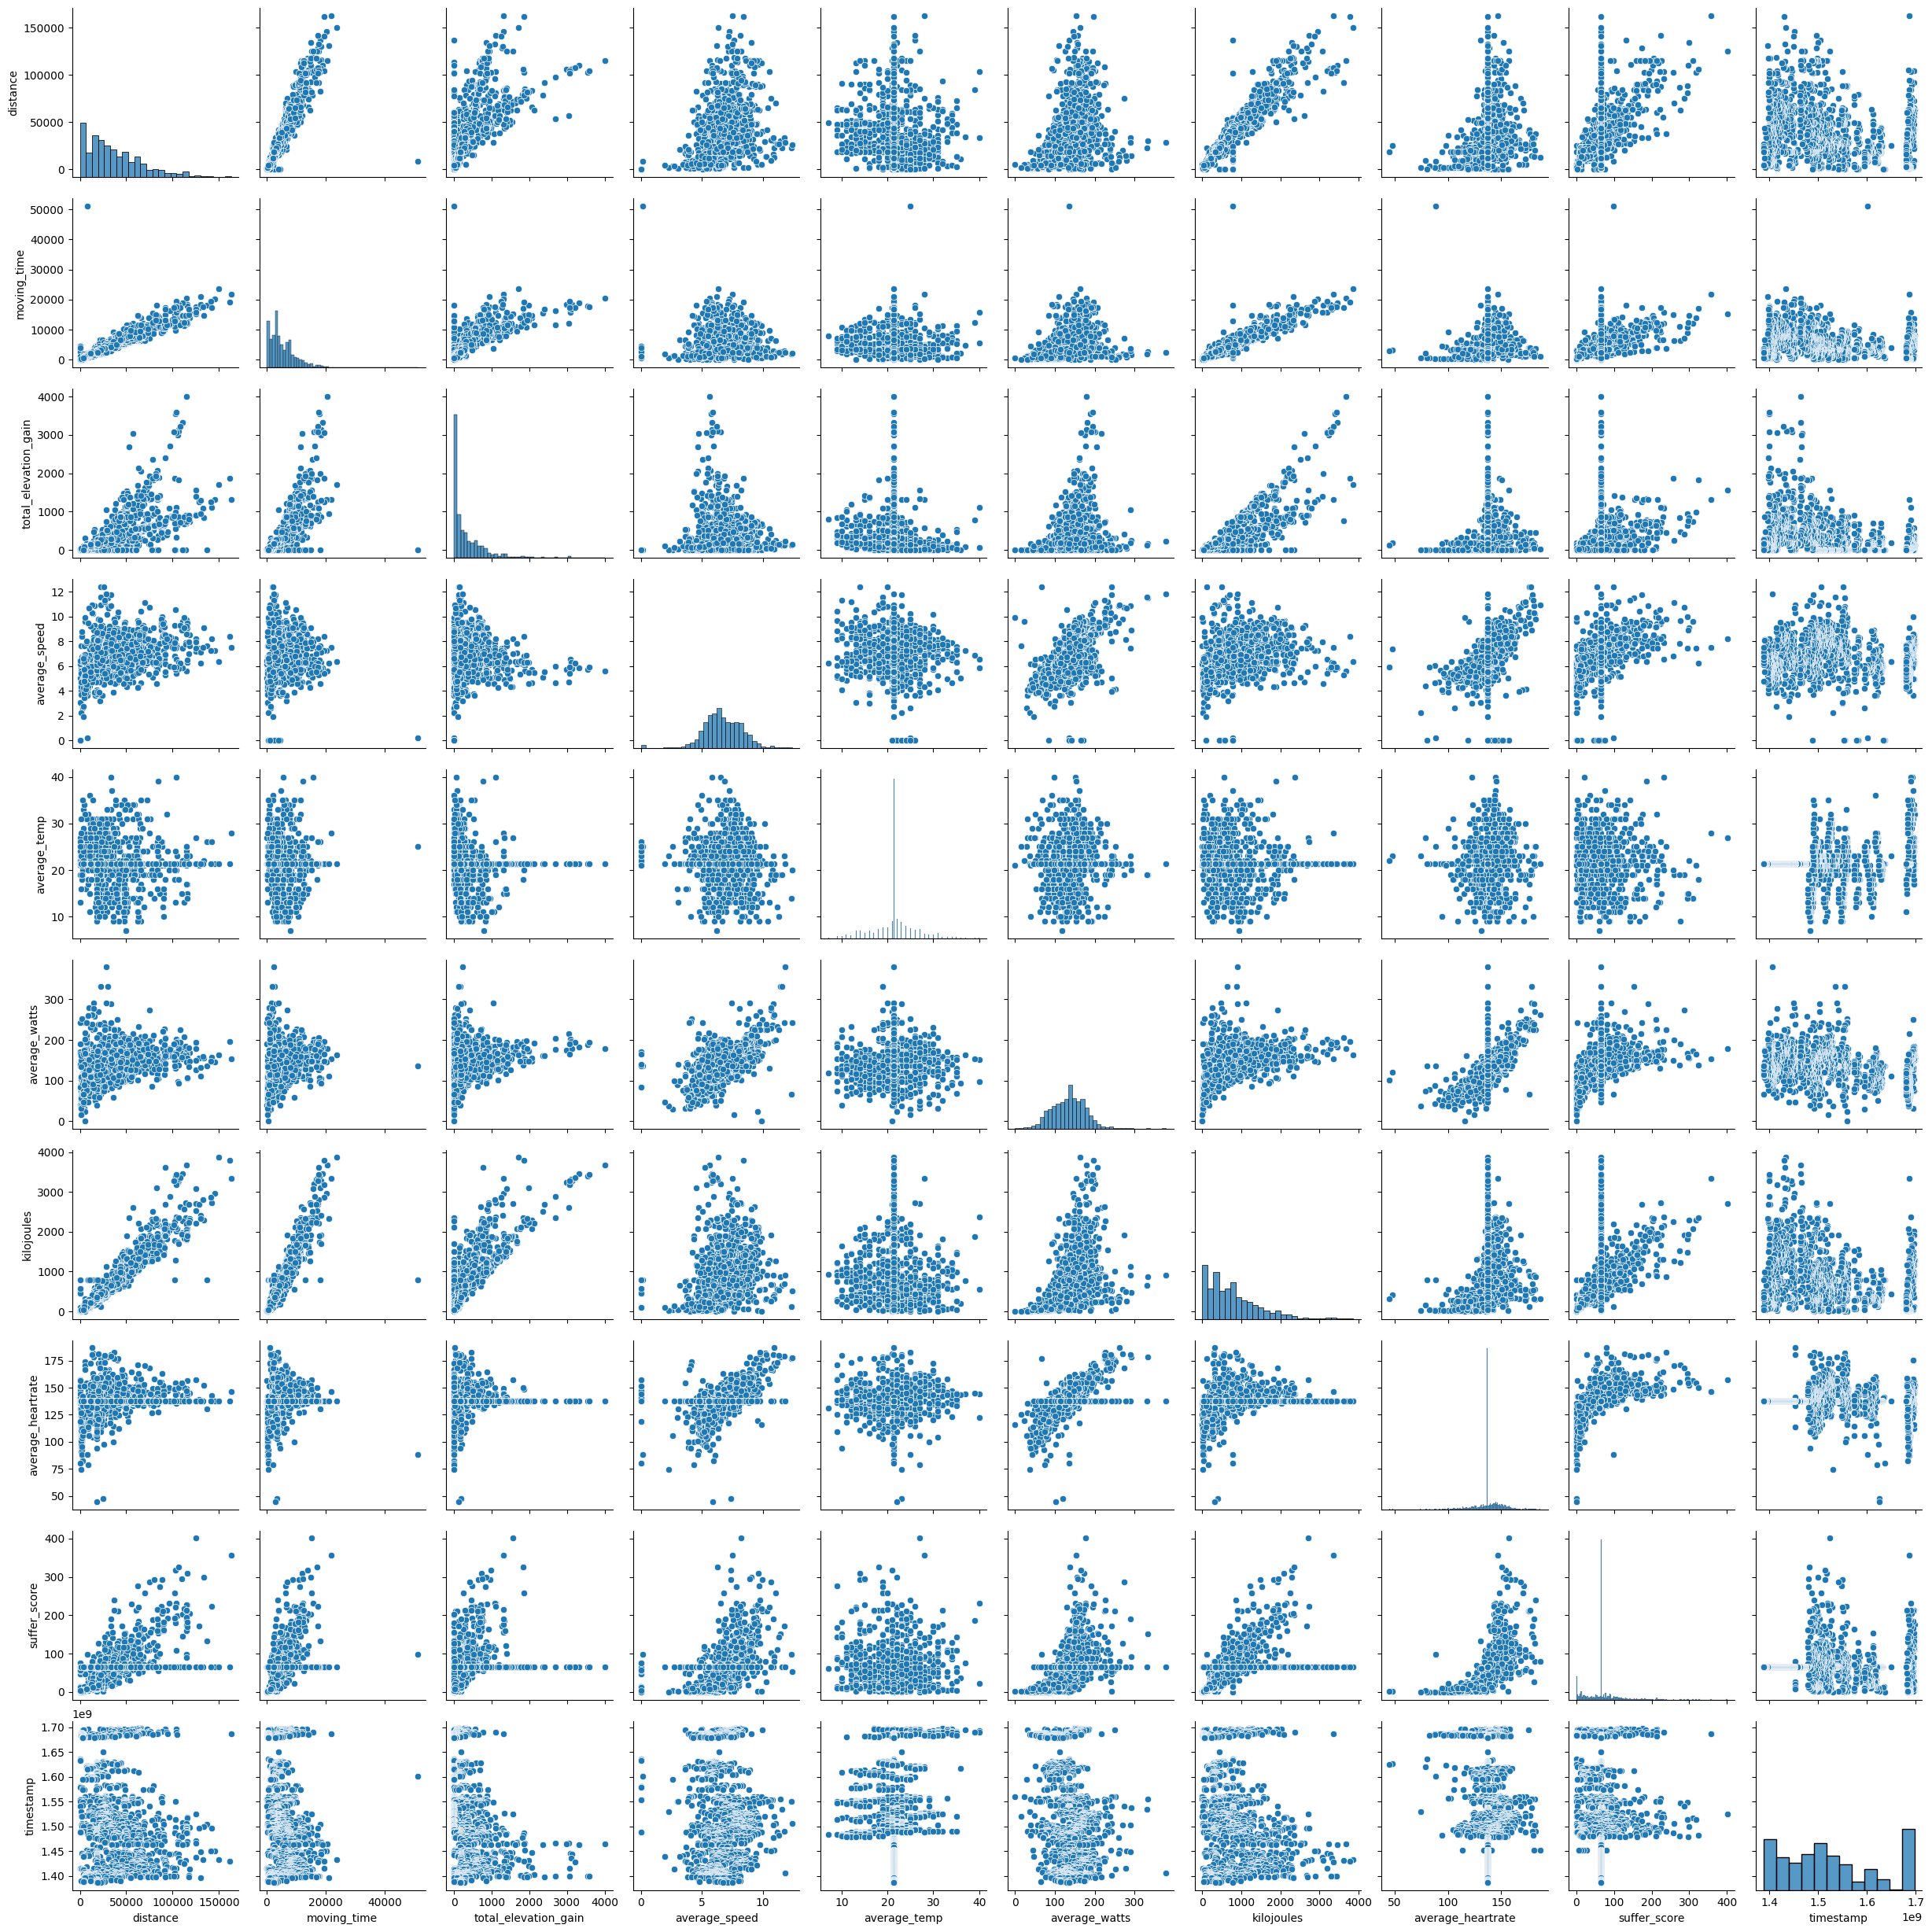

In [111]:
# visualize in a different way to see if more features can be reduced

sns.pairplot(only_rides_cleaned)

In [112]:
# focus on minimum required features

current_columns = ['moving_time', 'timestamp', 'average_speed', 'average_temp', 'average_watts', 'suffer_score']
pretransform = only_rides_cleaned[current_columns]
pretransform.head()

moving_time     timestamp  average_speed  average_temp  average_watts  \
0         8189  1.697537e+09          7.759          32.0          155.9   
1         8033  1.697351e+09          8.150          17.0          149.1   
2         4925  1.697270e+09          4.962          21.0           73.6   
3         1432  1.697269e+09          6.243          17.0           75.0   
4        13563  1.697178e+09          7.681          20.0          148.8   

   suffer_score  
0         176.0  
1         117.0  
2          28.0  
3           4.0  
4         108.0

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

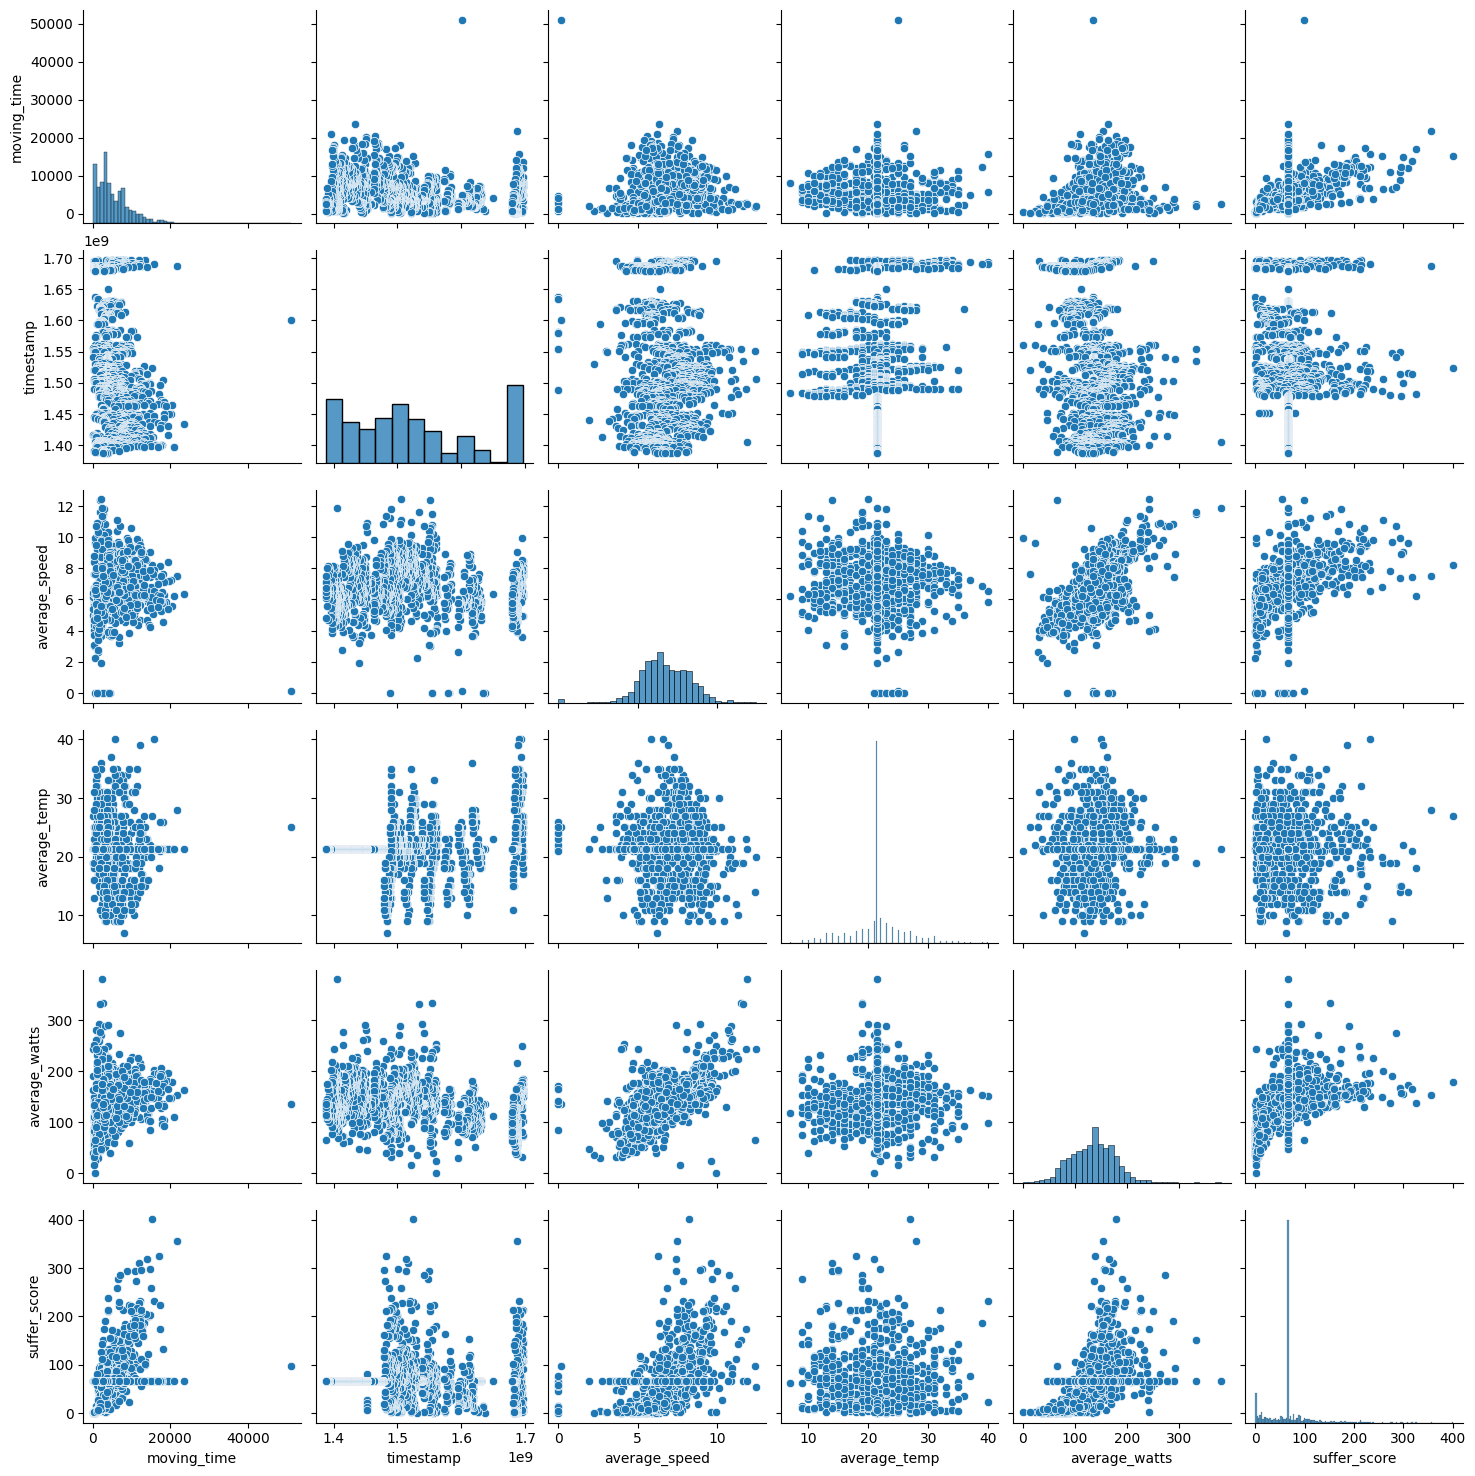

In [113]:
# confirm using visualization

sns.pairplot(pretransform)

In [114]:
# scale data to effectively cluster them

scaler = StandardScaler()
transformed_rides = pd.DataFrame()
transformed_rides[[x + '_t' for x in current_columns]] = scaler.fit_transform(only_rides_cleaned[current_columns])
transformed_rides.head()

moving_time_t  timestamp_t  average_speed_t  average_temp_t  \
0       0.679794     1.806607         0.666651        2.534169   
1       0.642896     1.804670         0.914118       -1.055618   
2      -0.092238     1.803830        -1.103594       -0.098342   
3      -0.918436     1.803812        -0.292838       -1.055618   
4       1.950904     1.802869         0.617284       -0.337661   

   average_watts_t  suffer_score_t  
0         0.479011        2.294163  
1         0.321250        1.046324  
2        -1.430358       -0.836010  
3        -1.397878       -1.343606  
4         0.314290        0.855975

In [115]:
# function to plot elbow curve

def plot_elbow_curve(df, k_range):
    # Create a list to store the means and intertias for each k value.
    means = []
    inertias = []

    # Iterate over the k values and perform k-means clustering.
    for k in range(1, k_range + 1):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        kmeans.fit(df)

        # Add the mean and inertia to the corresponding lists.
        means.append(k)
        inertias.append(kmeans.inertia_)

    # Plot the elbow curve.
    plt.figure(figsize=(10, 8))
    plt.plot(means, inertias, 'o-', markersize=2, linewidth=0.5)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow curve for k-means clustering')
    plt.savefig('visuals/Elbow_curve_for_k-means_clustering')
    plt.show()

    # Print the means and inertias for each k value.
    for i, k in enumerate(range(k_range)):
        print(f'k = {k}: mean = {means[i]}, inertia = {inertias[i]}')

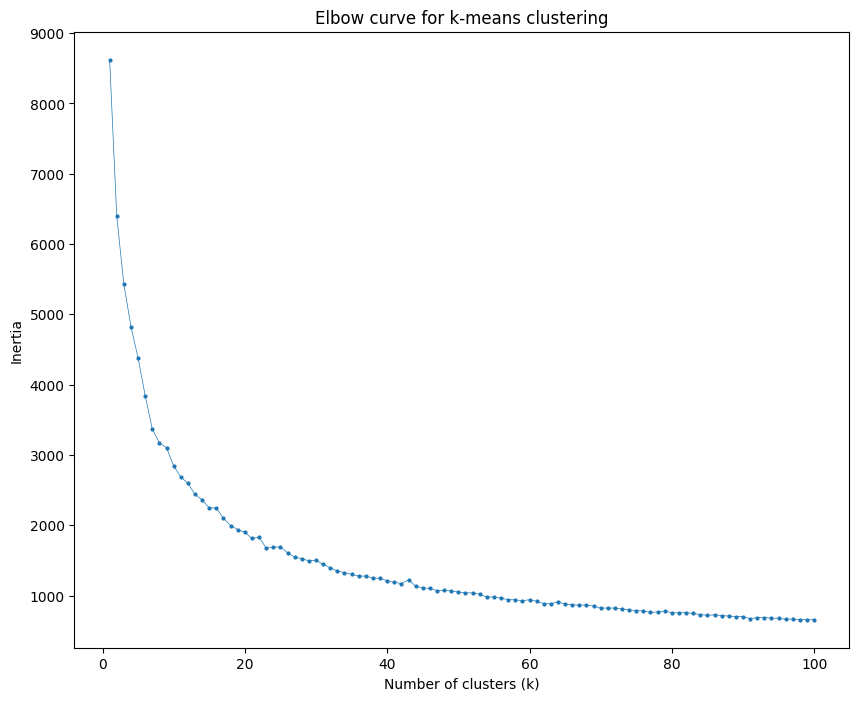

k = 0: mean = 1, inertia = 8622.000000000002
k = 1: mean = 2, inertia = 6395.882822089805
k = 2: mean = 3, inertia = 5428.468111502732
k = 3: mean = 4, inertia = 4826.257431887356
k = 4: mean = 5, inertia = 4378.7644255128835
k = 5: mean = 6, inertia = 3842.0406782308137
k = 6: mean = 7, inertia = 3366.5284625349186
k = 7: mean = 8, inertia = 3172.2039736777583
k = 8: mean = 9, inertia = 3103.024225936842
k = 9: mean = 10, inertia = 2844.9047886013814
k = 10: mean = 11, inertia = 2686.3050823258814
k = 11: mean = 12, inertia = 2598.6444321657063
k = 12: mean = 13, inertia = 2439.3244121522303
k = 13: mean = 14, inertia = 2361.5948086041144
k = 14: mean = 15, inertia = 2247.3358917219757
k = 15: mean = 16, inertia = 2245.0402210399634
k = 16: mean = 17, inertia = 2099.0701219012326
k = 17: mean = 18, inertia = 1996.213558946223
k = 18: mean = 19, inertia = 1939.2226331201675
k = 19: mean = 20, inertia = 1898.5371746397936
k = 20: mean = 21, inertia = 1812.8252445712515
k = 21: mean = 22

In [116]:
# visualize elbow curve for 100 clusters

plot_elbow_curve(transformed_rides, 100)

In [117]:
# function to train and plot clusters based on different data, number of clusters that can plot required columns

def train_and_plot_clusters(data, transformed_data, num_clusters, x_column, y_column, save=False, filename=''):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    data_copy = data.copy()
    data_copy[f'kmeans_{num_clusters}'] = kmeans.labels_
    plt.figure()
    plt.scatter(x=data_copy[x_column], y=data_copy[y_column], c=data_copy[f'kmeans_{num_clusters}'], s=2)
    plt.title(f'{num_clusters} Clusters in plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    if save:
        plt.savefig('visuals/' + filename)
    plt.show()
    return data_copy

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


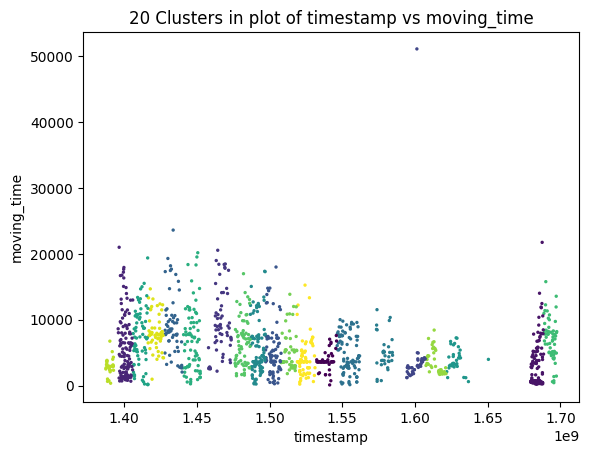

moving_time     timestamp  average_speed  average_temp  average_watts  \
0            8189  1.697537e+09          7.759     32.000000     155.900000   
1            8033  1.697351e+09          8.150     17.000000     149.100000   
2            4925  1.697270e+09          4.962     21.000000      73.600000   
3            1432  1.697269e+09          6.243     17.000000      75.000000   
4           13563  1.697178e+09          7.681     20.000000     148.800000   
...           ...           ...            ...           ...            ...   
1596         3429  1.388038e+09          6.229     21.371532     114.300000   
1597         3704  1.387866e+09          6.508     21.371532     130.800000   
1598         3159  1.387780e+09          7.116     21.371532     138.500000   
1599         2695  1.387521e+09          6.721     21.371532     128.900000   
1600         2510  1.387347e+09          7.489     21.371532     135.349603   

      suffer_score  kmeans_20  
0       176.000000         13  
1       117.000000         13  
2        28.000000         13  
3         4.000000         13  
4       108.000000         13  
...            ...        ...  
1596     65.414581         17  
1597     65.414581         17  
1598     65.414581         17  
1599     65.414581         17  
1600     65.414581         17  

[1437 rows x 7 columns]

In [118]:
# test for 20 clusters and plot based on timestamp and moving time

train_and_plot_clusters(pretransform, transformed_rides, 20, 'timestamp', 'moving_time')

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


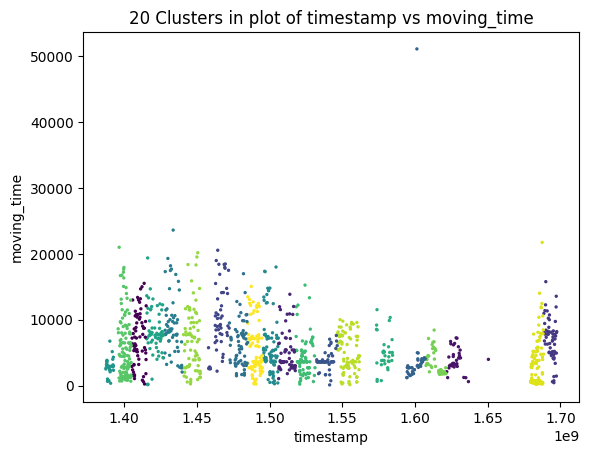

moving_time     timestamp  kmeans_20
0            8189  1.697537e+09          3
1            8033  1.697351e+09          3
2            4925  1.697270e+09          3
3            1432  1.697269e+09          3
4           13563  1.697178e+09          3
...           ...           ...        ...
1596         3429  1.388038e+09         10
1597         3704  1.387866e+09         10
1598         3159  1.387780e+09         10
1599         2695  1.387521e+09         10
1600         2510  1.387347e+09         10

[1437 rows x 3 columns]

In [119]:
# train only on 2 columns, looks like it works fairly similarly well with less data

train_and_plot_clusters(pretransform[['moving_time', 'timestamp']], transformed_rides[['moving_time_t', 'timestamp_t']], 20, 'timestamp', 'moving_time')

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


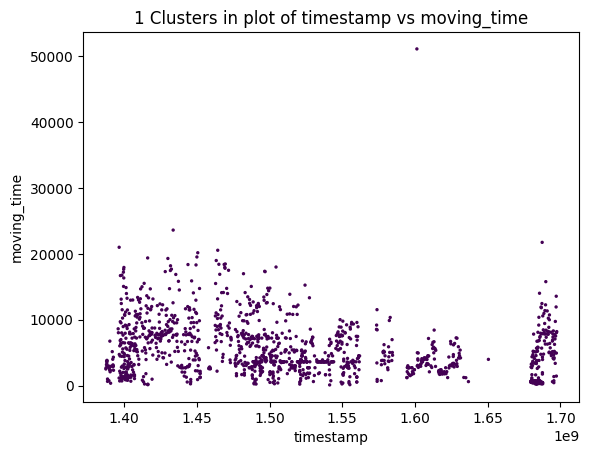

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


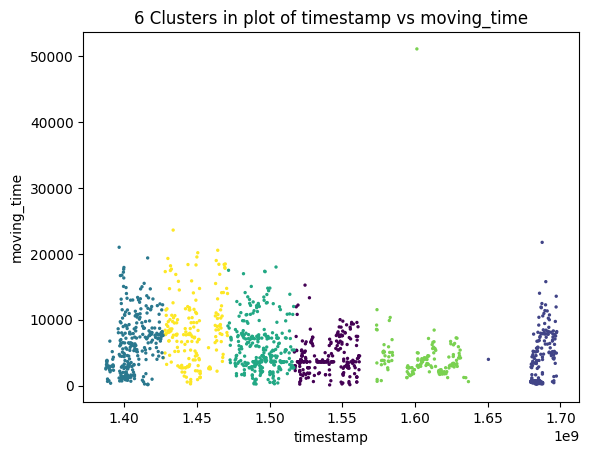

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


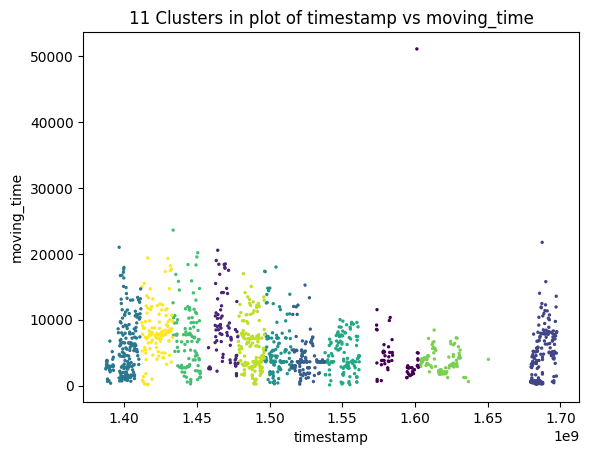

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


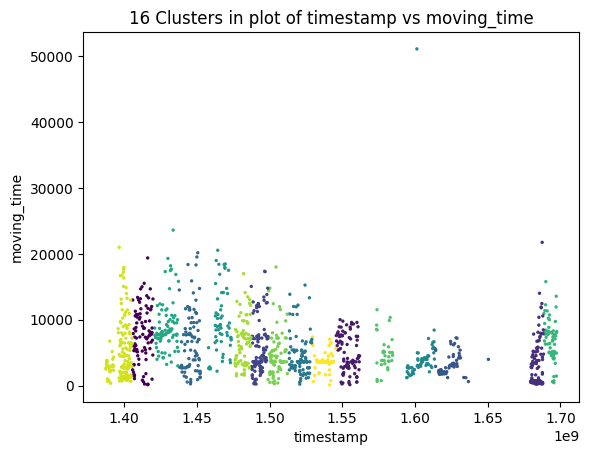

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


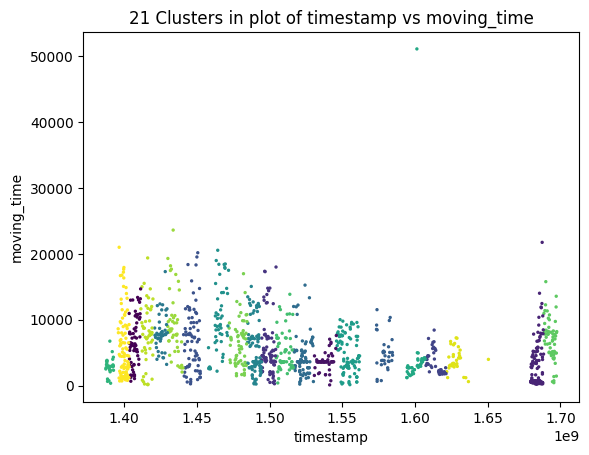

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


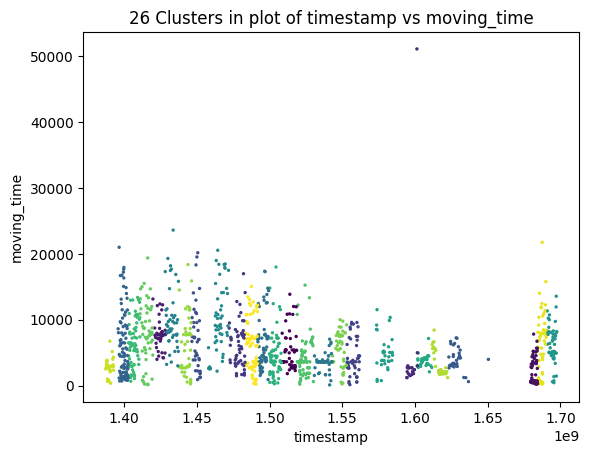

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


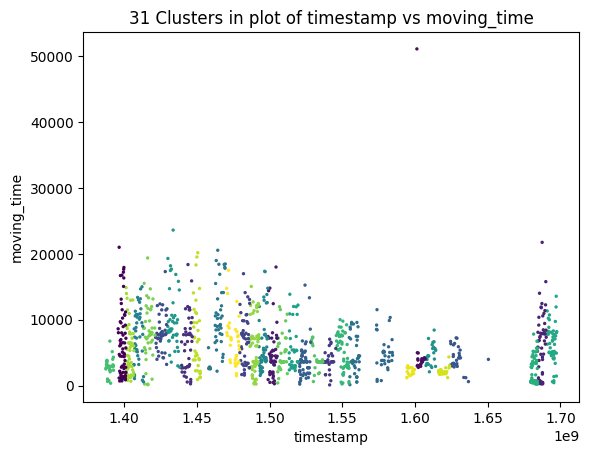

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


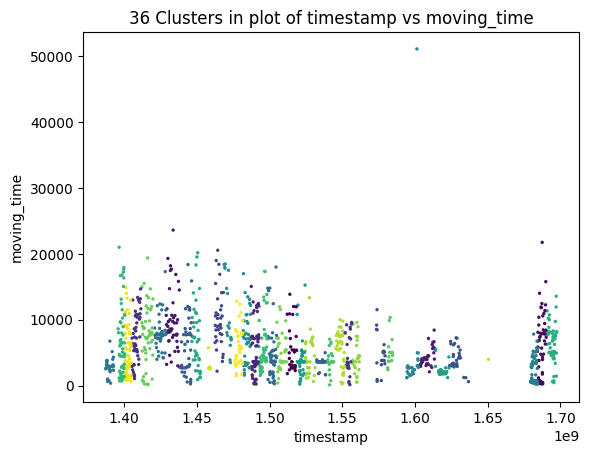

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


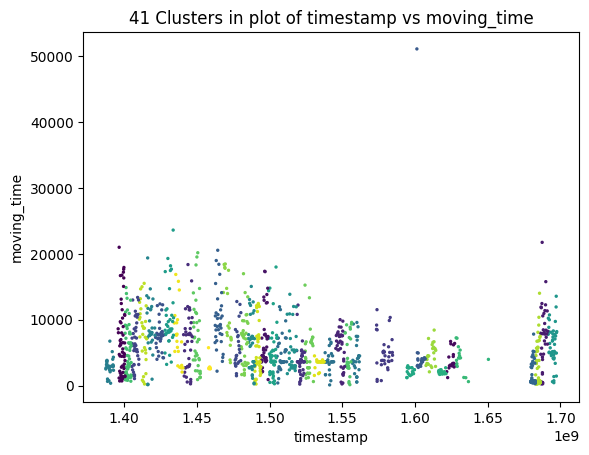

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


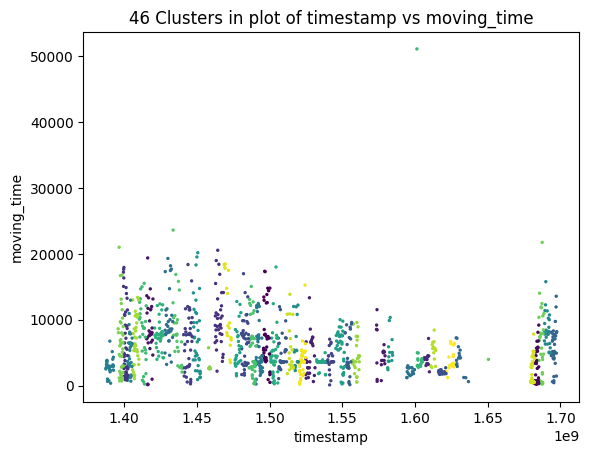

In [120]:
# visualize clustering for different cluster sizes

for i in range(1, 51, 5):
    train_and_plot_clusters(pretransform, transformed_rides, i, 'timestamp', 'moving_time')

In [121]:
# calculate the number of months from the first ride uploaded to the last ride uploaded

last_date = datetime.strptime(only_rides.head(1)['start_date_local'].iloc[0], "%Y-%m-%dT%H:%M:%SZ")
first_date = datetime.strptime(only_rides.tail(1)['start_date_local'].iloc[0], "%Y-%m-%dT%H:%M:%SZ")
total_months = (last_date - first_date).days // 30
total_months

119

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


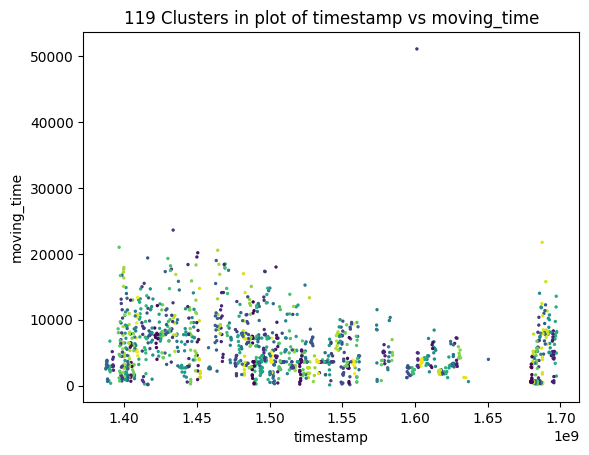

moving_time     timestamp  average_speed  average_temp  average_watts  \
0            8189  1.697537e+09          7.759     32.000000     155.900000   
1            8033  1.697351e+09          8.150     17.000000     149.100000   
2            4925  1.697270e+09          4.962     21.000000      73.600000   
3            1432  1.697269e+09          6.243     17.000000      75.000000   
4           13563  1.697178e+09          7.681     20.000000     148.800000   
...           ...           ...            ...           ...            ...   
1596         3429  1.388038e+09          6.229     21.371532     114.300000   
1597         3704  1.387866e+09          6.508     21.371532     130.800000   
1598         3159  1.387780e+09          7.116     21.371532     138.500000   
1599         2695  1.387521e+09          6.721     21.371532     128.900000   
1600         2510  1.387347e+09          7.489     21.371532     135.349603   

      suffer_score  kmeans_119  
0       176.000000          73  
1       117.000000          73  
2        28.000000          73  
3         4.000000          73  
4       108.000000          73  
...            ...         ...  
1596     65.414581          39  
1597     65.414581          39  
1598     65.414581          39  
1599     65.414581          39  
1600     65.414581          39  

[1437 rows x 7 columns]

In [122]:
# cluster based on number of months

train_and_plot_clusters(pretransform, transformed_rides, 119, 'timestamp', 'moving_time', save=True, filename='119_clusters.png')

In [123]:
from sklearn.metrics import silhouette_score

def train_and_evaluate_clusters(data, transformed_data, clusterer, model_name):
    preds = clusterer.fit_predict(transformed_data)

    score = silhouette_score(transformed_data, preds)
    print("For model {} silhouette score is {}".format(model_name, score))

In [124]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans

train_and_evaluate_clusters(pretransform, transformed_rides, KMeans(n_clusters=119), 'KMeans')
train_and_evaluate_clusters(pretransform, transformed_rides, AgglomerativeClustering(n_clusters=119), 'AgglomerativeClustering')
train_and_evaluate_clusters(pretransform, transformed_rides, MiniBatchKMeans(n_clusters=119), 'MiniBatchKMeans')

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For model KMeans silhouette score is 0.240739325537544
For model AgglomerativeClustering silhouette score is 0.2398740972133002
For model MiniBatchKMeans silhouette score is 0.23218972382689398


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [125]:
def train_and_label_clusters(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    data_copy = data.copy()
    data_copy[f'kmeans_{num_clusters}'] = kmeans.labels_
    
    data_copy.to_csv('k_means_clustered_data.csv')
    
    data_copy.drop('timestamp', axis=1, inplace=True)
    data_copy.drop('average_temp', axis=1, inplace=True)
    data_copy.drop('average_speed', axis=1, inplace=True)
    aggr = data_copy.groupby(f'kmeans_{num_clusters}').agg({'moving_time': 'mean', 'average_watts': 'mean', 'suffer_score': 'mean'}).reset_index()
    aggr['ride_count'] = data_copy.groupby(f'kmeans_{num_clusters}').size().reset_index(name='count')['count']

    aggr.to_csv('cluster_aggregates.csv')
    
    return aggr

In [126]:
aggr = train_and_label_clusters(pretransform, 119)
aggr.head()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmeans_119   moving_time  average_watts  suffer_score  ride_count
0           0   6776.846154     113.815385     82.153846          13
1           1   2048.645161      86.200000     25.806452          31
2           2  10094.000000     126.872727     65.414581          11
3           3   2204.875000     135.349603     33.853645           8
4           4   4053.000000     127.427273     68.037689          11